<ipython-input-7-eb263ff984f2>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


Mean Squared Error: 686.6019984158991


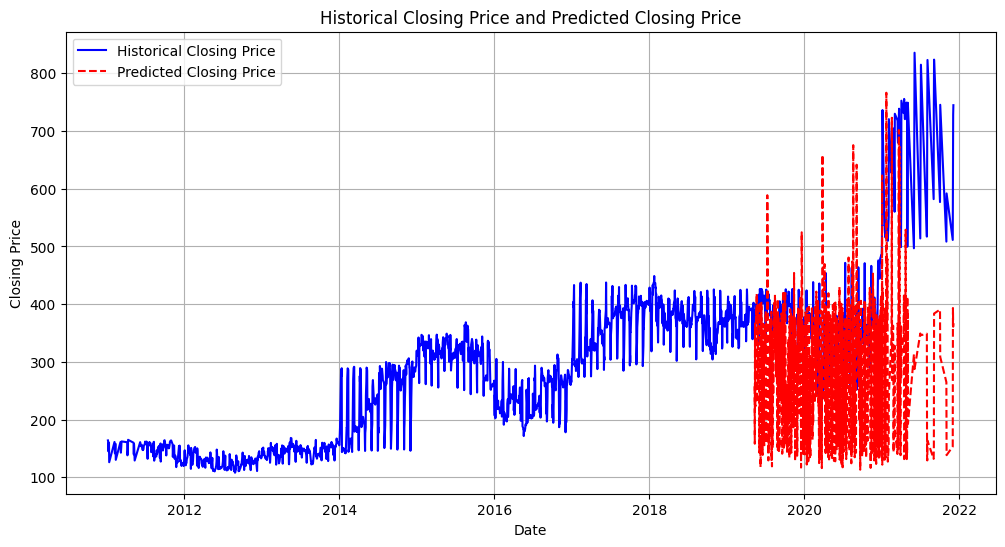

Predicted next 3-day stock prices: [675.79324869]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
#Q1.)Create a model to predict next 3 days stock prices using historical data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('ADANIPORTS.csv')
selected_columns = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
for i in range(1, 4):
    for col in selected_columns:
        data[f'{col}_lag_{i}'] = data[col].shift(i)
data.dropna(inplace=True)
X = data[[col for col in data.columns if 'lag' in col]]  # Input features (lagged prices)
y = data['Close']  # Target variable (next day's closing price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Historical Closing Price', color='blue')
plt.plot(data['Date'].iloc[-len(predictions):], predictions, label='Predicted Closing Price', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Closing Price and Predicted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict next 3-day stock prices using the most recent historical data
last_data = X.iloc[-1].values.reshape(1, -1)
next_3_days_predictions = model.predict(last_data)
print('Predicted next 3-day stock prices:', next_3_days_predictions)


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64
None
Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')
None
Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64
None


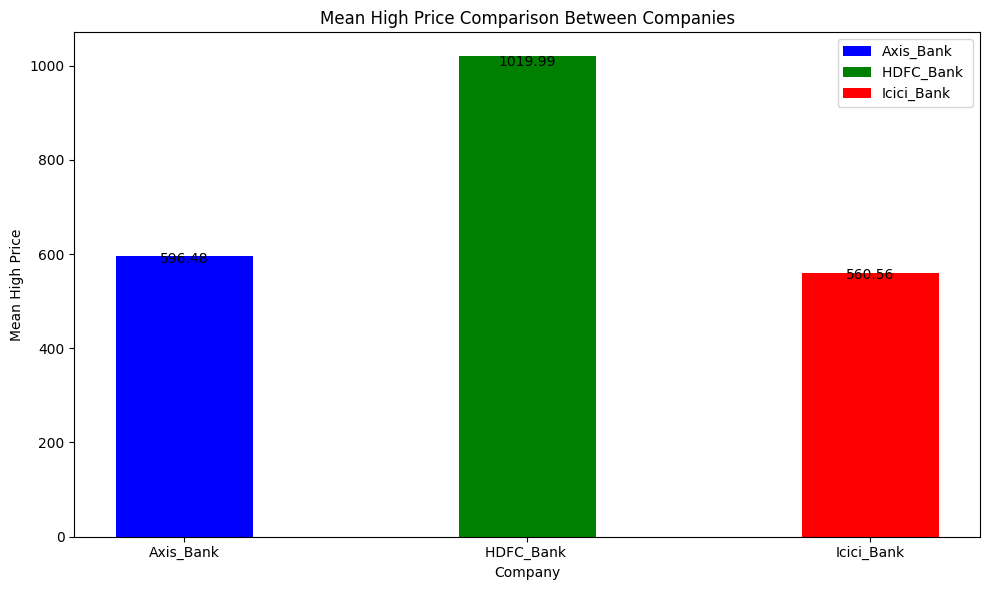

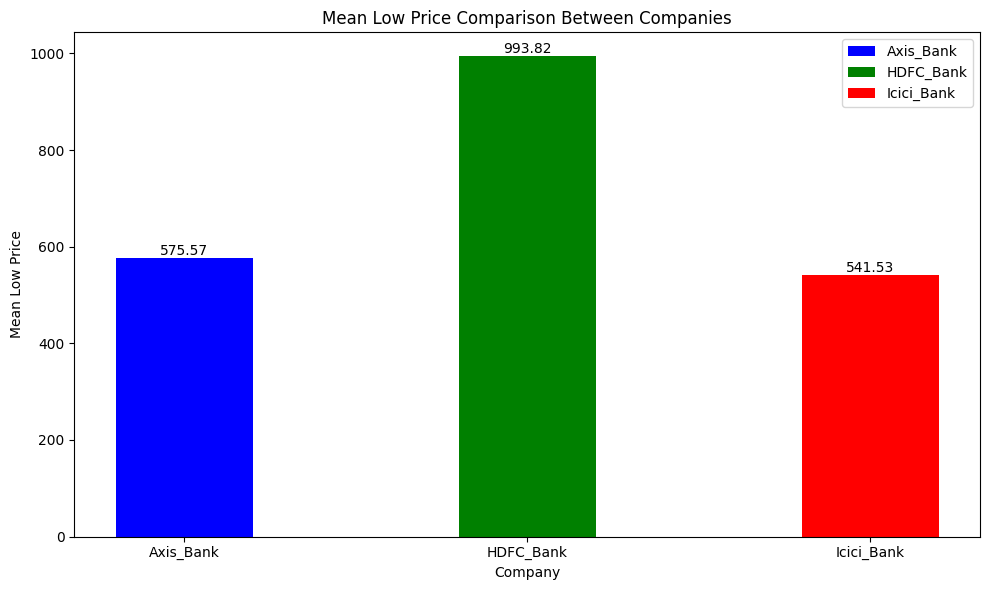

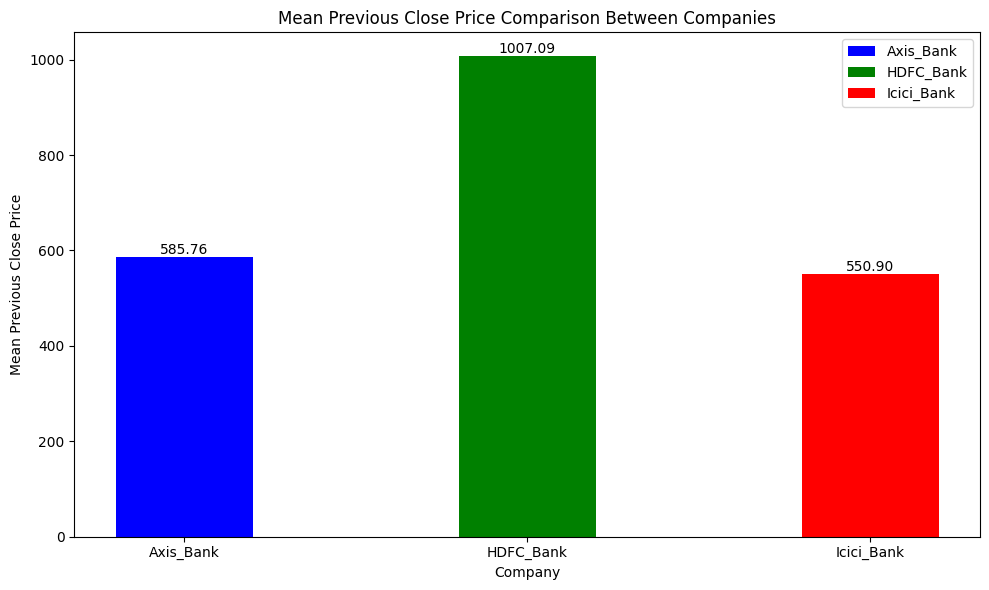

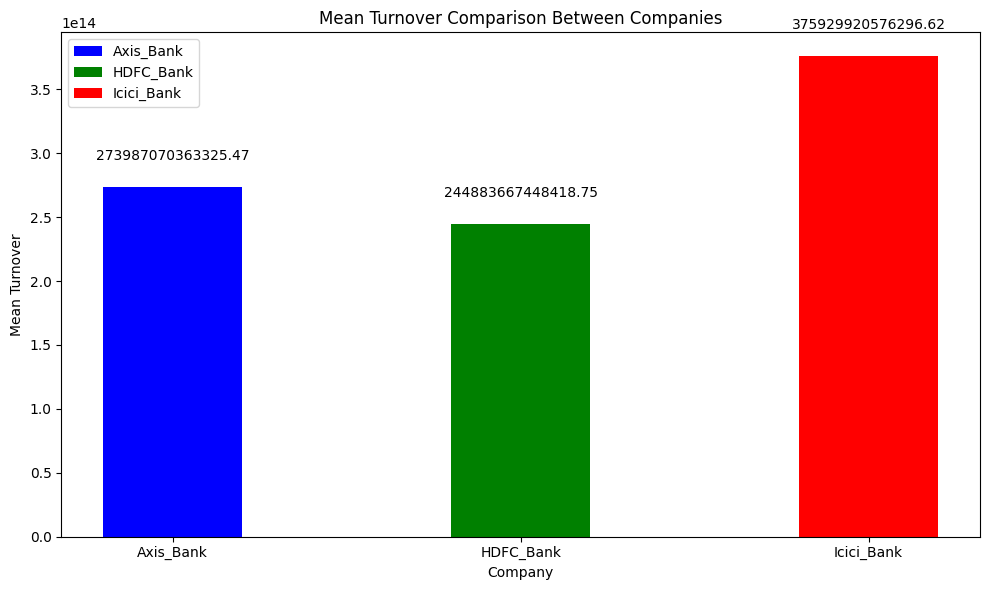

In [ ]:
#Q3.)Compare two or more copanies based on their industry
import pandas as pd
import matplotlib.pyplot as plt
#importing datasets
Axis_Bank = pd.read_csv('AXISBANK.csv')
Icici_Bank = pd.read_csv('ICICIBANK.csv')
HDFC_Bank = pd.read_csv('HDFCBANK.csv')

#Data Cleaning
print(Axis_Bank.isnull().sum())
print(Axis_Bank.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True))
print(Axis_Bank.columns)
print(Axis_Bank.drop_duplicates(inplace=True))
print(HDFC_Bank.isnull().sum())
print(HDFC_Bank.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True))
print(HDFC_Bank.columns)
print(HDFC_Bank.drop_duplicates(inplace=True))
print(Icici_Bank.isnull().sum())
print(Icici_Bank.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True))
print(Icici_Bank.columns)
print(Icici_Bank.drop_duplicates(inplace=True))
#DESCRIPTIVE STATISTICS
Axis_Bank_summary = Axis_Bank.describe()
Icici_Bank_summary = Icici_Bank.describe()
HDFC_Bank_summary = HDFC_Bank.describe()

# Display the summary statistics
print("Summary Statistics for Axis_Bank:")
print(Axis_Bank_summary)
print("\nSummary Statistics for Icici_Bank :")
print(Icici_Bank_summary)
print("\nSummary Statistics for HDFC_Bank  :")
print(HDFC_Bank_summary)
#Exploratory Data Analysis
#Comparing avg high stock price of companies
plt.figure(figsize=(10, 6))
plt.bar([0.8, 1.8, 2.8], [Axis_Bank['High'].mean(), HDFC_Bank['High'].mean(), Icici_Bank['High'].mean()], width=0.4, color=['blue', 'green', 'red'], label = ['Axis_Bank', 'HDFC_Bank ', 'Icici_Bank'])
# Adding text labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{high_prices[i]:.2f}', ha='center', va='bottom')

plt.xticks([0.8, 1.8, 2.8], ['Axis_Bank', 'HDFC_Bank ', 'Icici_Bank'])
plt.xlabel('Company')
plt.ylabel('Mean High Price')
plt.title('Mean High Price Comparison Between Companies')
plt.tight_layout()
plt.legend()
plt.show()
#Comparing avg Low stock price of companies
plt.figure(figsize=(10, 6))
companies = ['Axis_Bank', 'HDFC_Bank', 'Icici_Bank']
low_prices = [Axis_Bank['Low'].mean(), HDFC_Bank['Low'].mean(), Icici_Bank['Low'].mean()]
bar_colors = ['blue', 'green', 'red']
bars = plt.bar([0.8, 1.8, 2.8], low_prices, width=0.4, color=bar_colors, label=companies)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{low_prices[i]:.2f}', ha='center', va='bottom')
plt.xticks([0.8, 1.8, 2.8], companies)
plt.xlabel('Company')
plt.ylabel('Mean Low Price')
plt.title('Mean Low Price Comparison Between Companies')
plt.tight_layout()
plt.legend()
plt.show()
#Comparing Previous closing stock price of companies
plt.figure(figsize=(10, 6))
companies = ['Axis_Bank', 'HDFC_Bank', 'Icici_Bank']
prev_close_prices = [Axis_Bank['Prev Close'].mean(), HDFC_Bank['Prev Close'].mean(), Icici_Bank['Prev Close'].mean()]
bar_colors = ['blue', 'green', 'red']
bars = plt.bar([0.8, 1.8, 2.8], prev_close_prices, width=0.4, color=bar_colors, label=companies)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{prev_close_prices[i]:.2f}', ha='center', va='bottom')
plt.xticks([0.8, 1.8, 2.8], companies)
plt.xlabel('Company')
plt.ylabel('Mean Previous Close Price')
plt.title('Mean Previous Close Price Comparison Between Companies')
plt.tight_layout()
plt.legend()
plt.show()
plt.show()
#Comparing Turnover of companies
plt.figure(figsize=(10, 6))
companies = ['Axis_Bank', 'HDFC_Bank', 'Icici_Bank']
turnover_values = [Axis_Bank['Turnover'].mean(), HDFC_Bank['Turnover'].mean(), Icici_Bank['Turnover'].mean()]
bar_colors = ['blue', 'green', 'red']
bars = plt.bar([0.8, 1.8, 2.8], turnover_values, width=0.4, color=bar_colors, label=companies)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * max(turnover_values), f'{turnover_values[i]:.2f}', ha='center', va='bottom')
plt.xticks([0.8, 1.8, 2.8], companies)
plt.xlabel('Company')
plt.ylabel('Mean Turnover')
plt.title('Mean Turnover Comparison Between Companies')
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
import pandas as pd

dataset = 'KOTAKBANK.csv'
df = pd.read_csv(dataset)
print(df.head())

def is_valid_date(date):
    """
    Check if the input date is in the correct format (YYYY-MM-DD).
    """
    try:
        pd.to_datetime(date)
        return True
    except ValueError:
        return False

def search_by_date(date):
    """
    Search for all records with a specific date.
    """
    if is_valid_date(date):
        date_info = df[df['Date'] == date]
        if not date_info.empty:
            return date_info
        else:
            return f"No information found for date '{date}'."
    else:
        return "Invalid date format. Please enter the date in the format YYYY-MM-DD."

def main():
    while True:
        search_type = input("Enter 'date' to search by date, 'exit' to quit: ").lower()
        if search_type == 'exit':
            print("Exiting...")
            break
        elif search_type == 'date':
            date = input("Enter the date (format: YYYY-MM-DD): ")
            result = search_by_date(date)
            print(result)
        else:
            print("Invalid input. Please enter 'date' or 'exit'.")

if __name__ == "__main__":
    main()


         Date    Symbol Series  Prev Close   Open    High     Low    Last  \
0  2000-01-03  KOTAKMAH     EQ      212.35  220.0  229.35  220.00  229.35   
1  2000-01-04  KOTAKMAH     EQ      229.35  247.7  247.70  225.25  247.70   
2  2000-01-05  KOTAKMAH     EQ      246.95  229.0  240.00  227.20  228.00   
3  2000-01-06  KOTAKMAH     EQ      228.40  235.1  239.00  217.00  224.95   
4  2000-01-07  KOTAKMAH     EQ      225.90  213.0  219.00  207.85  207.85   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  229.35  229.13    7086  1.623640e+11     NaN                 NaN   
1  246.95  244.12   73681  1.798729e+12     NaN                 NaN   
2  228.40  233.75  105799  2.473093e+12     NaN                 NaN   
3  225.90  226.84   40202  9.119546e+11     NaN                 NaN   
4  208.85  209.94   24463  5.135747e+11     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
Invalid 